<a href="https://colab.research.google.com/github/JoaquinJustelP/Python_UB_2024/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding regions of high density with **DBSCAN**
Density-based Spatial Clustering of Applications with Noise.

DBSCAN no hace suposiciones sobre grupos esféricos como k-means, ni divide el conjunto de datos en jerarquías que requieren un punto de corte manual.

Para DBSCAN, un clúster es un área densa rodeada de áreas menos densas

### Noción de densidad:

En DBSCAN se define como el número de puntos dentro de un radio especificado $\varepsilon$

### ¿Cómo etiqueta DBSCAN los datos?

+ Un punto se considera un **punto central** si al menos un número específico ($MinSamples$) de puntos vecinos se encuentran dentro del radio especificado $\varepsilon$.

+ Un **punto frontera** es un punto que tiene menos vecinos que $MinSamples$ dentro, pero se encuentra dentro del radio $\varepsilon$ de un punto central.

+ Todos los demás puntos que no son ni centrales ni fronterizos se consideran **puntos de ruido**.

Después de etiquetar los puntos como núcleo, borde o ruido, el algoritmo DBSCAN se puede resumir en dos pasos:

1. Forma un cluster separado para cada punto central o grupo conectado de puntos centrales (los puntos centrales están conectados si se encuentran dentro de $\varepsilon$ de otro punto central).

2. Asigna cada punto de borde al grupo de su punto central correspondiente.

### Cómo usar DBSCAN con sklearn

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

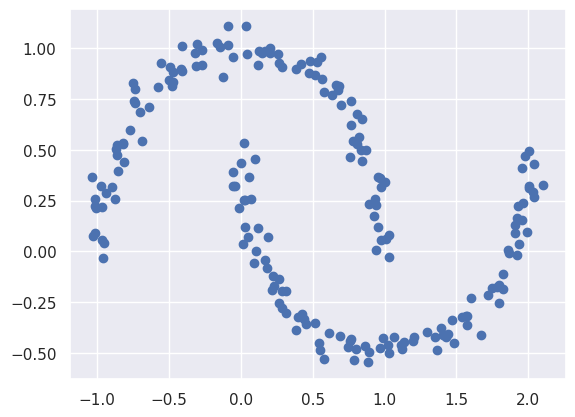

In [ ]:
X, y = make_moons(200, noise=0.05)
plt.scatter(X[:,0], X[:,1])

In [ ]:
db = DBSCAN(eps=0.2, min_samples=5)

In [ ]:
y_db = db.fit_predict(X)

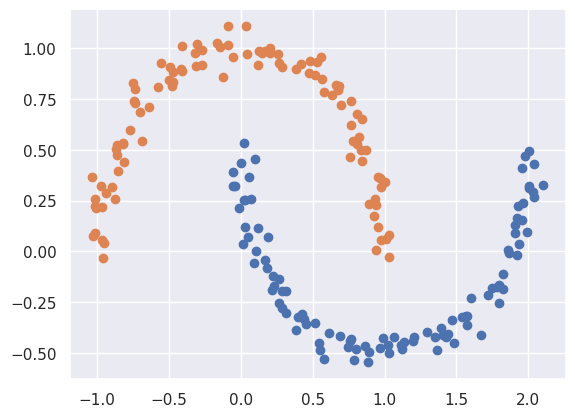

In [ ]:
for l in np.unique(y_db):
    plt.scatter(X[y_db==l, 0], X[y_db==l, 1])

### Pros y contras de DBSCAN


Ventajas:
+ No tenemos que elegir un número de clústeres $k$
+ No supone que los clusters tengan forma esférica
+ No necesariamente asigna cada punto a un grupo

Contras:

+ Ahora tenemos dos hiperparámetros para optimizar: $\varepsilon$ y $MinSamples$
+ Encontrar una buena combinación de hiperparámetros puede ser problemático si las diferencias de densidad en el conjunto de datos son relativamente grandes


